## Agent 1 Practice

In [1]:
from typing import TypedDict, Dict
from langgraph.graph import StateGraph # the framework that helps us to design and manage the flow in out application environment using lang graphs
from IPython.display import Image, display

import math

In [2]:
# Now we create AgentState that will be our shared data structure to keep track of the information as our application runs

class AgentState( TypedDict ):
    message : str


def greeting_node(state : AgentState ) -> AgentState :
    """ Simple note that adds a greeting message """
    state["message"] = f"Hi {state['message']}, How is your day going so far?"
    return state



In [3]:
graph = StateGraph(state_schema = AgentState)

graph.add_node(node = "greeter", action = greeting_node)

graph.set_entry_point(key = "greeter")
graph.set_finish_point(key = "greeter")

app = graph.compile()


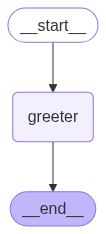

In [4]:
display(Image(app.get_graph().draw_mermaid_png())) 

In [5]:
result = app.invoke({"message":"Bob"})
result["message"]

'Hi Bob, How is your day going so far?'

## Agent 1 Exercise

### Our task: Create a Personalized Compliment Agent using LangGraph!

**Input:** {"name": "Neil"}  
**Output:** "Neil, you're doing an amazing job learning LangGraph!"

*Hint: You have to concatenate the state, not replace it*

In [6]:
class AgentState(TypedDict):
    name: str


def compliment_node(state: AgentState) -> AgentState:
    """ Simple node that adds a compliment message with name"""
    state["name"] = f"Hi {state['name']}, you're doing an amazing job learning LangGraph!"
    return state



In [7]:
graph = StateGraph(state_schema=AgentState) # we create a new graph for the complimenter application

graph.add_node(node="complimenter", action=compliment_node)
graph.set_entry_point(key="complimenter")
graph.set_finish_point(key="complimenter")
app = graph.compile()

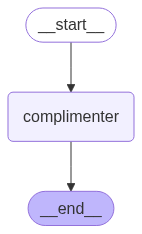

In [8]:
display(Image(app.get_graph().draw_mermaid_png())) # we display the graph of the complimenter application 


In [9]:
result = app.invoke({"name": "Neil"})
result["name"] 

"Hi Neil, you're doing an amazing job learning LangGraph!"

## Agent 2 Graph II : Practice 

In [10]:
class AgentState(TypedDict):
    value: list[int]
    name : str
    result: str

In [11]:
def process_values ( state : AgentState) -> AgentState :
    """ Simple node that processes a list of values and returns a result """
    state["result"] = f"Hi there, {state['name']}! Your sum of values is = {sum(state['value'])}"
    return state

In [12]:
graph = StateGraph(state_schema =  AgentState) # we create a new graph for the value processor application

graph.add_node(node = "process_values", action = process_values)

graph.set_entry_point(key = "process_values")
graph.set_finish_point(key = "process_values")

app = graph.compile()



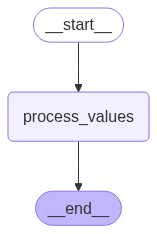

In [13]:
display(Image(app.get_graph().draw_mermaid_png())) 

In [14]:
result = app.invoke({"name":"Neil", "value": [1,2,3,4,5,6,7,8,9,10]})

display(result["result"]) 

'Hi there, Neil! Your sum of values is = 55'

## Agent 2 Graph II : Exercise 

Create a __Graph__ where you pass in a single list of integers along with a name and an 
operation. If the operation is a “+”, you __add__ the elements and if it is a “*”, you 
__multiply__ the elements, __all within the same node.__

__Input:__ {"name": "Neil Sparrow","values": [1,2,3,4] , "operation": "*"}

__Output:__ "Hi Neil Sparrow, your answer is: 24"

*Hint: You need an if-statement in your node!*


In [15]:
class AgentState(TypedDict):
    name: str
    values: list[int]
    operation: str
    result: str 

In [16]:
def process_operation(state: AgentState) -> AgentState:
    """ Simple node that processes a list of values and returns a result based on the operation """
    answer : int = 0
    if state["operation"] == "+":
        answer = sum(state["values"])
    
    elif state["operation"] == "*":
        answer = math.prod(state["values"])
                
    else: 
        answer = 0
           
    
    state["result"] = f"Hi {state["name"]}, You had selected {state["operation"]} operation, and the result is {answer}"
       
    
    return state
    

In [17]:
graph = StateGraph(state_schema=AgentState)  # we create a new graph for the operation processor application

graph.add_node(node="process_operation", action=process_operation)

graph.set_entry_point(key="process_operation")  
graph.set_finish_point(key="process_operation")

app = graph.compile()


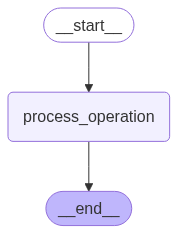

In [18]:
display( Image(app.get_graph().draw_mermaid_png()))  # we display the graph of the operation processor application


In [19]:
# additional 
result : Dict = app.invoke({"name": "Neil Sparrow", "values": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], "operation": "+"})
display(result["result"]) 

# Multiplication
result = app.invoke({"name": "Neil Sparrow", "values": [1, 2, 3, 4, 5, 6, 7, 8, 9,10], "operation": "*"})
display(result["result"])

'Hi Neil Sparrow, You had selected + operation, and the result is 55'

'Hi Neil Sparrow, You had selected * operation, and the result is 3628800'

## Agent 3 Graph III : Practice 

In [20]:
class AgentState(TypedDict):
    name: str
    age: str
    final: str

In [21]:
def first_node(state : AgentState) -> AgentState:
    """This is first node for the agent"""
    
    state["final"] =  f"Hi {state['name']}!"
    return state

def second_node(state: AgentState) -> AgentState:
    """This is Second Node for the Agent"""
    
    state['final'] = state['final'] + f" you are {state['age']} years old."    
    return state

In [22]:
graph = StateGraph(state_schema= AgentState)

graph.add_node(node = "first_node", action= first_node)
graph.add_node(node = "second_node", action= second_node)

graph.add_edge(start_key="first_node",end_key="second_node")

graph.set_entry_point( key= "first_node")
graph.set_finish_point(key= "second_node")


app = graph.compile()




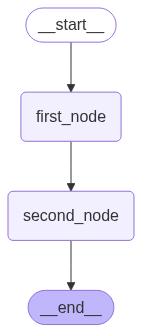

In [23]:
display(Image(app.get_graph().draw_mermaid_png()))

In [24]:
result : Dict = app.invoke(input = {"name":"Charlie","age": 20})

display(result["final"])

'Hi Charlie! you are 20 years old.'

The End 😊 